In [1]:
import qutip as qutip
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

Sigma_x=qutip.sigmax()
Sigma_y=qutip.sigmay()
Sigma_z=qutip.sigmaz()

Omega_I=0
Omega_Q=1

Psi0=qutip.basis(2, 0)   #|0>
Psi1=qutip.basis(2, 1)   #|0>


Hamil=0.5*Omega_I*Sigma_x+0.5*Omega_Q*Sigma_y

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal, normal

"""In order to provide a better presentation of the graphs we use the rcParams options shown below."""

import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (11.0, 8.0)

from numpy import cos, sin


label_size = 20

# Exercise 1F

In [3]:
Psi1=(tensor(Psi0,Psi1)-tensor(Psi1,Psi0))/np.sqrt(2)

In [4]:
def dens(ket):
    
    return ket*(ket.conj()).trans()

Identity_4=tensor(Qobj(np.identity(2)),Qobj(np.identity(2)))

In [5]:



def RhoW(p):
    
    return p*dens(Psi1)+((1-p)/4)*Identity_4

In [6]:
RhoW(1)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]

In [7]:
pval=np.linspace(0,1,1000)
concurrence=[]

for pv in pval:
    
    concurrence.append( qutip.concurrence(RhoW(pv))   )
    

For exercise 1F, the degree of entaglement is measured using the concurrence.

Text(0.5, 0, 'p value')

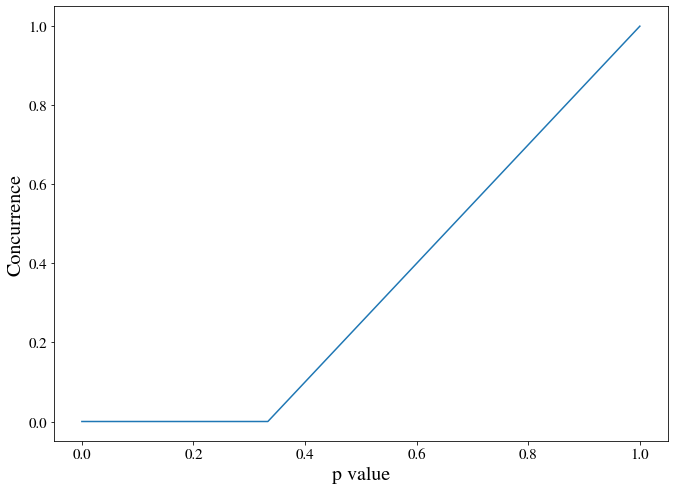

In [8]:
plt.plot(pval,concurrence)


plt.ylabel("Concurrence",fontsize=20)
plt.xlabel("p value",fontsize=20)

# Problem 3. A)

In [9]:
times = np.linspace(0.0, 2*np.pi, 2000)
result = sesolve(Hamil, Psi0, times, [Sigma_x,Sigma_y,Sigma_z])
result1 = sesolve(Hamil, Psi0, times, [])


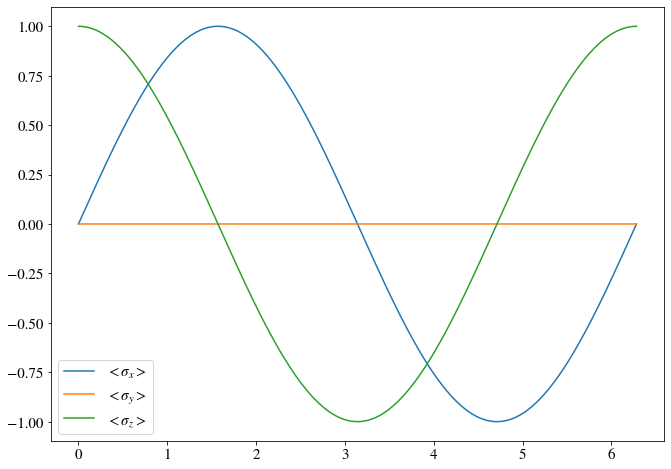

In [10]:
plt.plot(times,result.expect[0],label="$<\sigma_x>$")
plt.plot(times,result.expect[1],label="$<\sigma_y>$")
plt.plot(times,result.expect[2],label="$<\sigma_z>$")




plt.legend()

In [11]:
max(result.expect[0]-1)

-3.0845207343865866e-07

In [12]:
np.argmax(result.expect[0]-1)

500

In [13]:
result1 = sesolve(Hamil, Psi0, times, [])


In [14]:
Est_plus=result1.states[np.argmax(result.expect[0]-1)]  #Getting |+>

In [15]:
Est_minus=result1.states[np.argmin(result.expect[0]-1)]  #Getting |->

In [16]:
Est_minus

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70682853]
 [ 0.70738493]]

# The time required for $\left|+\right>$ is:

In [17]:


times[np.argmax(result.expect[0]-1)]   #|+>, the time is pi/2

1.5715821178538234

In [18]:
# The time required for |-> is:

times[np.argmin(result.expect[0]-1)]   #|-> the time is 3pi/2

4.711603189325762

In [19]:
Ket_plus=(1/np.sqrt(2))*(qutip.basis(2, 0)+qutip.basis(2, 1))
Ket_minus=(1/np.sqrt(2))*(qutip.basis(2, 0)-qutip.basis(2, 1))

In [20]:
#Fidelity |+>

fidelity(Ket_plus, Est_plus)

0.9999999228869784

In [21]:
#Fidelity |->

In [22]:
fidelity(Ket_minus, Est_minus)

0.99999992260416

We mostly generate the expected states (up to numerical errors and estimations).

# Problem 3. B)

In [23]:
import qutip as qutip
import numpy as np
from qutip import *
import matplotlib.pyplot as plt

Sigma_x=qutip.sigmax()
Sigma_y=qutip.sigmay()
Sigma_z=qutip.sigmaz()


Psi0=qutip.basis(2, 0)   #|0>

Hamil=0.5*Omega_I*Sigma_x+0.5*Omega_Q*Sigma_y

In [24]:
tensor(Sigma_x,Sigma_x)

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]

In [25]:
times=np.linspace(0,2,4000)

In [26]:

g=3
Psi0=tensor(Est_plus,-Est_minus)
Hamil_XX = 0.5*g*(tensor(Sigma_x,Sigma_x) + tensor(Sigma_y,Sigma_y))
result = sesolve(Hamil_XX, Psi0, times, [])


In [27]:
U_iswap = iswap()


<ipython-input-27-b3d1fbfeedb7>:1: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  U_iswap = iswap()


In [28]:
Psi_t=U_iswap*Psi0

In [29]:
Den_des=Psi_t*(Psi_t.conj()).trans()

In [30]:
Psi_t

Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
Qobj data =
[[ 0.49960692+0.j        ]
 [ 0.        +0.49999949j]
 [ 0.        -0.50000021j]
 [-0.50039308+0.j        ]]

In [31]:




norm_dif=[]

import time

t0=time.time()


for time in range(len(times)):
    
    norm_dif.append(np.linalg.norm( dens(result.states[time])- Den_des ) )
    


In [32]:
np.argmin(norm_dif)

3141

In [33]:
#Time required


times[np.argmin(norm_dif)]

1.5708927231807954

The time is mostly $\pi/2$

In [34]:
dens(result.states[np.argmin(norm_dif)])

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 2.49794632e-01+0.00000000e+00j -7.19382061e-05-2.49803124e-01j
   7.19381026e-05+2.49803484e-01j -2.50187694e-01+0.00000000e+00j]
 [-7.19382061e-05+2.49803124e-01j  2.49811637e-01+0.00000000e+00j
  -2.49811997e-01-2.07044577e-10j  7.20514039e-05-2.50196200e-01j]
 [ 7.19381026e-05-2.49803484e-01j -2.49811997e-01+2.07044577e-10j
   2.49812356e-01+0.00000000e+00j -7.20513002e-05+2.50196560e-01j]
 [-2.50187694e-01+0.00000000e+00j  7.20514039e-05+2.50196200e-01j
  -7.20513002e-05-2.50196560e-01j  2.50581374e-01+0.00000000e+00j]]

In [35]:
# Fidelity 


fidelity(dens(result.states[np.argmin(norm_dif)]), Den_des)


1.000000768456426

In [36]:
#Concurrence

qutip.concurrence(dens(result.states[np.argmin(norm_dif)])) 

0.9999993201739794